In [2]:
from pandas import *
import matplotlib.pyplot as plt
set_option('display.notebook_repr_html',False)
import pandas
pandas.__version__

'0.16.2'

In [3]:
names = read_csv('baby-names2.csv')

In [4]:
names.head()

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

In [5]:
boys = names[names.sex=='boy']
girls = names[names.sex=='girl']

In [6]:
names.groupby(['sex','year'][::-1]).size()[2000]

sex
boy     1000
girl    1000
dtype: int64

In [7]:
girls.ix[girls[girls.year==1900].prop.argmax()]


year           1900
name           Mary
prop       0.052567
sex            girl
soundex        M600
Name: 149000, dtype: object

In [13]:
boys.year.value_counts()

1983    1000
1887    1000
2000    1000
1937    1000
2001    1000
1938    1000
2002    1000
1939    1000
2003    1000
1940    1000
2004    1000
1941    1000
2005    1000
1942    1000
2006    1000
1943    1000
2007    1000
1880    1000
1944    1000
2008    1000
1881    1000
1945    1000
1882    1000
1946    1000
1883    1000
1947    1000
1884    1000
1948    1000
1885    1000
1949    1000
        ... 
1895    1000
1952    1000
1889    1000
1953    1000
1890    1000
1954    1000
1891    1000
1955    1000
1892    1000
1956    1000
1893    1000
1957    1000
1894    1000
1958    1000
1959    1000
1966    1000
1896    1000
1960    1000
1897    1000
1961    1000
1898    1000
1962    1000
1899    1000
1963    1000
1900    1000
1964    1000
1901    1000
1965    1000
1902    1000
1920    1000
dtype: int64

In [63]:
boys[boys.year==2000]

        year         name      prop  sex soundex
120000  2000        Jacob  0.016514  boy    J210
120001  2000      Michael  0.015346  boy    M240
120002  2000      Matthew  0.013695  boy    M300
120003  2000       Joshua  0.013194  boy    J200
120004  2000  Christopher  0.011990  boy    C623
120005  2000     Nicholas  0.011815  boy    N242
120006  2000       Andrew  0.011324  boy    A536
120007  2000       Joseph  0.010930  boy    J210
120008  2000       Daniel  0.010681  boy    D540
120009  2000        Tyler  0.010305  boy    T460
120010  2000      William  0.009896  boy    W450
120011  2000      Brandon  0.009745  boy    B653
120012  2000         Ryan  0.009715  boy    R500
120013  2000         John  0.009617  boy    J500
120014  2000      Zachary  0.009516  boy    Z260
120015  2000        David  0.009454  boy    D130
120016  2000      Anthony  0.009416  boy    A535
120017  2000        James  0.008613  boy    J520
120018  2000       Justin  0.008520  boy    J235
120019  2000    Alex

In [75]:
def get_max_record_yr(group, yr):
    return group.ix[group[group.year==yr].prop.idxmax()]
get_max_record(boys,1880)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [79]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]
result = boys.groupby('year').apply(get_max_record)

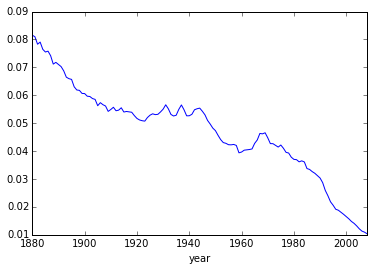

In [80]:
result.prop.plot()

In [140]:
idf = boys.set_index(['name','year']) # set index, extremely convenient

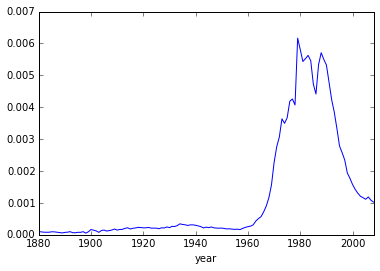

In [102]:
idf.ix['Travis'].prop.plot()

In [105]:
boys.groupby('name')['prop'].mean()

name
Aaden        0.000442
Aarav        0.000101
Aaron        0.002266
Ab           0.000044
Abb          0.000046
Abbie        0.000046
Abbott       0.000044
Abdiel       0.000092
Abdul        0.000064
Abdullah     0.000094
Abe          0.000225
Abel         0.000152
Abelardo     0.000041
Abie         0.000042
Abner        0.000130
Abraham      0.000494
Abram        0.000105
Ace          0.000080
Acey         0.000042
Acie         0.000062
Acy          0.000046
Ada          0.000057
Adalberto    0.000051
Adam         0.002242
Adams        0.000053
Adan         0.000131
Add          0.000043
Addie        0.000065
Addison      0.000114
Adelard      0.000065
               ...   
Yoshio       0.000054
Young        0.000080
Yurem        0.000091
Yusuf        0.000096
Zachariah    0.000275
Zachary      0.003748
Zachery      0.000369
Zack         0.000113
Zackary      0.000373
Zackery      0.000232
Zaid         0.000086
Zaiden       0.000106
Zain         0.000100
Zaire        0.000100
Zakar

In [111]:
boys.groupby('soundex')['prop'].sum().idxmax()

'J500'

In [127]:
boys[boys['soundex']=='J500']['name'].unique()

array(['John', 'Jim', 'Juan', 'Jimmie', 'Johnnie', 'Johnny', 'Johnie',
       'Jean', 'June', 'Jonah', 'Jennie', 'Jimmy', 'Johny', 'Jonnie',
       'Johney', 'Jamie', 'Jon', 'Joan', 'Jan', 'Jame', 'Jaime', 'Jamey',
       'Jaimie', 'Jammie', 'Jayme', 'Juwan', 'Johan', 'Jaheim', 'Jahiem',
       'Jaheem'], dtype=object)

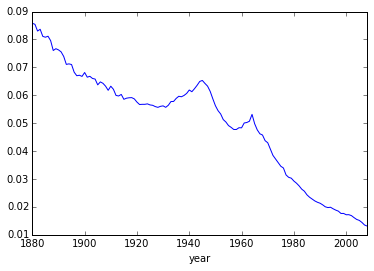

In [121]:
boys[boys['soundex']=='J500'].groupby('year')['prop'].sum().plot()

In [136]:
boys.groupby('name')['prop'].max().order(ascending=False)

name
John           0.081541
William        0.080511
Robert         0.056598
James          0.055406
Michael        0.046564
Charles        0.045167
George         0.043292
David          0.041253
Richard        0.035667
Jason          0.033595
Christopher    0.032051
Donald         0.028637
Joseph         0.027555
Frank          0.027380
Mark           0.027121
Matthew        0.026959
Thomas         0.025261
Brian          0.022132
Joshua         0.021946
Henry          0.021599
Harry          0.021496
Edward         0.020297
Ronald         0.020102
Daniel         0.020035
Gary           0.019963
Larry          0.018806
Andrew         0.018573
Steven         0.018100
Jacob          0.017765
Justin         0.017519
                 ...   
Rudolfo        0.000034
Pamela         0.000033
Terance        0.000033
Brenda         0.000033
Geoff          0.000033
Dann           0.000032
Tina           0.000032
Linden         0.000032
Cornel         0.000032
Renard         0.000032
Rahn       

In [148]:
result = boys.groupby('year')['prop'].describe()

In [163]:
result[:5]

year       
1880  count    1000.000000
      mean        0.000931
      std         0.004871
      min         0.000042
      25%         0.000059
dtype: float64

In [316]:

df = boys[boys.year==1880].sort_index(by = 'prop', ascending=False)
df.prop.cumsum().searchsorted(0.5)
#df.prop.cumsum()[:130]

array([15])

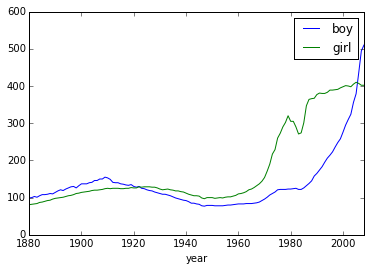

In [252]:
def get_quantile_count(group, quantile=0.5):
    group = group.groupby('soundex').sum() # group by sound
    df = group.sort_index(by = 'prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)[0]
#f = lambda x: get_quantile_count(x, 0.1)
q = 0.8
boy_ct = boys.groupby('year').apply(get_quantile_count, quantile = q)
girl_ct = girls.groupby('year').apply(get_quantile_count, quantile = q)
boy_ct.plot(label='boy')
girl_ct.plot(label='girl')
plt.legend(loc='best')

In [346]:
myname = 'Patrick'
group = boys[boys.year==2000]
myprop = group.set_index('name').prop[myname]
print "the prop for", myname, "is", myprop
rank = group.name.count()-group.sort_index(by='prop',ascending=True)['prop'].searchsorted(myprop)
print 'the rank is #', rank[0]
#group.sort_index(by='prop',ascending=False)

the prop for Patrick is 0.003016
the rank is # 68


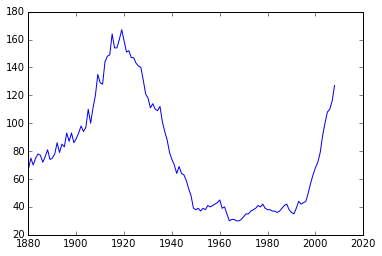

In [429]:
def get_name_rank(myname, year):
    group = boys[boys.year==year]
    myprop = group.set_index('name').prop[myname]
    rank = group.name.count()-group.sort_index(by='prop',ascending=True)['prop'].searchsorted(myprop)
    return rank[0]
#    print 'the rank is #', rank[0]

ranks = [ get_name_rank('Patrick',year) for year in boys.year.unique() ]
plt.plot(boys.year.unique(), ranks)

In [448]:
grouped = boys.groupby('year').prop
#boys['year_rank'] = 1001-grouped.transform(Series.rank) # one way to do it
boys['year_rank'] = grouped.rank(ascending=False) # another way to do it
idf = boys.set_index(['name','year'])
idf.ix['Wesley'].year_rank[:10]

year
1880    109.0
1881    118.0
1882    101.5
1883    122.0
1884    121.0
1885    128.0
1886    120.5
1887    116.0
1888    113.0
1889    145.5
Name: year_rank, dtype: float64

In [463]:
grouped = boys.groupby('year').prop
grouped.count()
grouped.sum()
grouped.rank(ascending=False)
#grouped2.groupby(boys.year).mean()

0           1.0
1           2.0
2           3.0
3           4.0
4           5.0
5           6.0
6           7.0
7           8.0
8           9.0
9          10.0
10         11.0
11         12.0
12         13.0
13         14.0
14         15.0
15         16.0
16         17.0
17         18.0
18         19.0
19         20.0
20         21.5
21         21.5
22         23.0
23         24.0
24         25.0
25         26.0
26         27.0
27         28.0
28         29.0
29         30.0
          ...  
128970    973.0
128971    973.0
128972    973.0
128973    973.0
128974    973.0
128975    973.0
128976    973.0
128977    980.5
128978    980.5
128979    980.5
128980    980.5
128981    980.5
128982    980.5
128983    985.0
128984    985.0
128985    985.0
128986    988.5
128987    988.5
128988    988.5
128989    988.5
128990    993.5
128991    993.5
128992    993.5
128993    993.5
128994    993.5
128995    993.5
128996    998.5
128997    998.5
128998    998.5
128999    998.5
dtype: float64

In [464]:
births = read_csv('births.csv')

In [474]:
merged = merge(names, births, on=['year','sex'])

In [475]:
merged['persons'] = np.floor(merged.prop * merged.births)

In [519]:
merged.groupby(['name']).persons.sum()


name
Aaden          959
Aaliyah      39660
Aarav          219
Aaron       509399
Ab              24
Abagail       2680
Abb             15
Abbey        14333
Abbie        16566
Abbigail      6792
Abbott           9
Abby         47845
Abdiel         199
Abdul         2609
Abdullah      2352
Abe           6835
Abel         30752
Abelardo        68
Abie             4
Abigail     240993
Abigale       2429
Abigayle      3510
Abner         2304
Abraham      68620
Abram         8148
Abril         3660
Ace            935
Acey             4
Achsah           3
Acie           100
             ...  
Zela            11
Zelda        10001
Zelia           77
Zella         9951
Zelma        15513
Zelpha          88
Zena          1020
Zenas            6
Zeno            41
Zenobia        562
Zeta            11
Zetta          501
Zettie         305
Zhane          592
Zigmund        202
Zillah          26
Zilpah           8
Zilpha          70
Zina          2263
Zion         12958
Zita           831
Zoa    

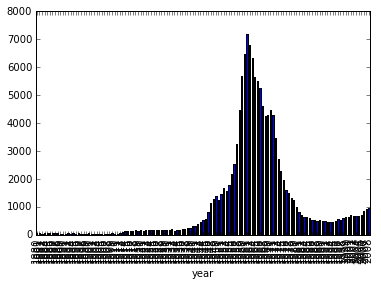

In [563]:
merged
idf = merged.set_index(['year','name','sex']).persons.ix[:,:,'boy']
idf[:,'Chris'].plot(kind='bar')

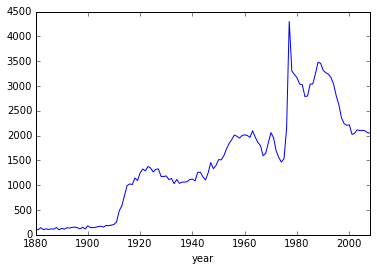

In [571]:
idf
idf.unstack('name')['Wesley'].plot()